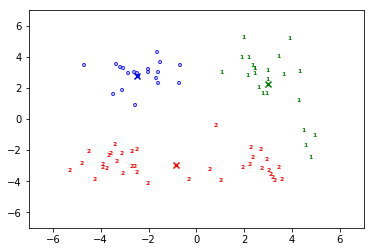

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def loadDataset(infile):
    df = pd.read_csv(infile,sep='\t',header=0,dtype = str, na_filter=False)
    return np.array(df).astype(np.float)

class KMeansCluster():
    def __init__(self, k = 3,initCent = 'random', max_iter = 500):
        self._k = k  # 簇心个数
        self._initCent = initCent  # 初始化簇心
        self._max_iter = max_iter  # 最大迭代次数
        self._clusterAssment = None  # 
        self._labels = None  # 每个点对应的簇编号， 即标签
        
    def _calEDist(self, arrA, arrB):
        """计算欧式距离"""
        return np.math.sqrt(sum(np.power(arrA - arrB, 2)))
    
    def _randCent(self,data_X,k):
        """随机初始化簇心"""
        n = data_X.shape[1]  # 特征维数
        centroids = np.empty((k,n))  # 建立用于储存簇心的矩阵
        
        # 在数据各个维度范围内进行随机初始化簇心
        for j in range(n):
            minJ = min(data_X[:,j])
            rangeJ = float(max(data_X[:,j] - minJ))
            centroids[:,j] = (minJ +rangeJ * np.random.rand(k,1)).flatten()
        return centroids
    
    def fit(self, data_X):
        # 检测输入
        if not isinstance(data_X, np.ndarray) or isinstance(data_X, np.matrixlib.defmatrix.matrix):
            try:
                data_X = np.asarray(data_X)
            except:
                raise TypeError("numpy.ndarray resuired for data_X")
            
        m = data_X.shape[0]  # 获取数据长度，即样本个数
        # 建立一个m*2的矩阵，其第一列储存样本点对应的label，第二列储存该店与簇心的平方误差
        self._clusterAssment = np.zeros((m,2))
        if self._initCent == 'random':
            self._centroids = self._randCent(data_X, self._k)

        clusterChanged = True  # 检测簇心是否发生变化的flag
        for _ in range(self._max_iter):  # 直到最大迭代次数
            clusterChanged = False
            # 对每个点，找其最近的簇心
            for i in range(m):
                minDist = np.inf
                minIndex = -1
                for j in range(self._k):
                    arrA = self._centroids[j,:]
                    arrB = data_X[i,:]
                    distJI = self._calEDist(arrA, arrB)
                    if distJI < minDist:
                        minDist = distJI
                        minIndex = j
                if self._clusterAssment[i,0] != minIndex or self._clusterAssment[i,1] >minDist ** 2:
                    clusterChanged = True
                    # 记录各个点对应的簇心变化情况
                    self._clusterAssment[i, :] = minIndex, minDist ** 2
            if not clusterChanged:
                break
            for i in range(self._k):
                index_all = self._clusterAssment[:,0]
                value = np.nonzero(index_all == i)
                ptsInClust = data_X[value[0]]
                self._centroids[i,:] = np.mean(ptsInClust, axis = 0)
        self._labels = self._clusterAssment[:,0]

if __name__  == "__main__":
    data_X = loadDataset(r"data.txt")  # 加载数据
    k = 3  # 设置簇个数
    clf = KMeansCluster(k)  # 创建实例
    clf.fit(data_X)  # 训练模型
    cents = clf._centroids  # 取出簇心
    labels = clf._labels  # 取出标签
    
    # 绘图
    colors = ['b','g','r','k','c','m','y','#e24fff','#524C90','#845868']
    for i in range(k):
        index = np.nonzero(labels == i)[0]
        x0 = data_X[index,0]
        x1 = data_X[index,1]
        y_i = i
        for j in range(len(x0)):
            plt.text(x0[j],x1[j],str(y_i),color = colors[i], fontdict = {'weight': 'bold','size':6})
        plt.scatter(cents[i,0],cents[i,1],marker='x',color=colors[i],linewidths=7)
    plt.axis([-7,7,-7,7])
    plt.show()